In [204]:
import cv2
import scipy.signal as signal
import scipy.fft as fft

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import skimage.io as skio

from skimage.color import rgb2gray
from skimage.color import gray2rgb
from align_image_code import align_images

<h2>Part 1</h2>

[[2.0 1.5 1.5 ... 1.5 1.5 0.0]
 [1.5 0.0 0.0 ... 0.0 0.0 -1.5]
 [1.5 0.0 0.0 ... 0.0 0.0 -1.5]
 ...
 [0.7117647058823529 -0.7882352941176471 0.02941176470588236 ... 0.0 0.0
  -1.5]
 [1.2372549019607844 0.0 0.7980392156862745 ... 0.0 0.0 -1.5]
 [0.0 -1.2372549019607844 -0.7117647058823529 ... -1.5 -1.5 -2.0]]


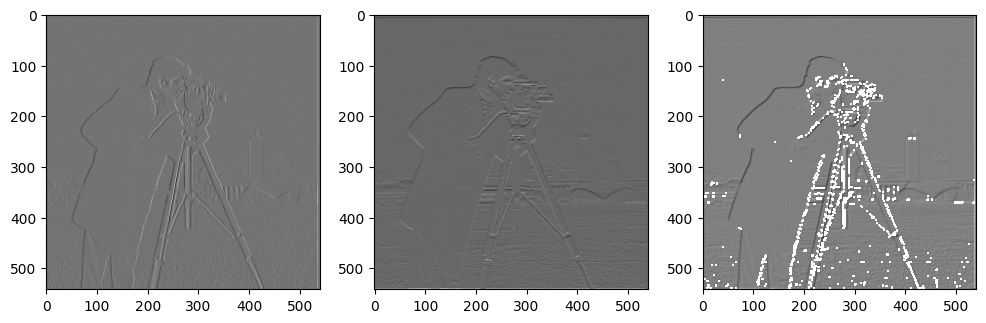

In [3]:
# Q1.1 - Partial Derivatives
%matplotlib inline

# Partial x and y derivatives

img = skio.imread("../images/cameraman.png")
img = rgb2gray(img[:,:,:3])
# plt.imshow(img)

D_x = np.tile(np.array([1,-1])[None,:], [2, 1])
D_y = np.tile(np.array([1,-1]).T[:,None], [1, 2])

# Dx
img_D_x = signal.convolve2d(img, D_x, mode="same")
# Dy
img_D_y = signal.convolve2d(img, D_y, mode="same")

# # TODO: Edge Filtering
edge_D_x = np.tile(np.array([1,0,-1])[None,:], [3, 1])
edge_D_y = np.tile(np.array([1,0,-1]).T[:,None], [1, 3])

# edge_conv_x = signal.convolve2d(img, edge_D_x, mode="same")
# edge_conv_y = signal.convolve2d(img, edge_D_y, mode="same")

# gradient_mag = np.sqrt((edge_D_x**2) + (edge_D_y**2))
# img_edge = signal.convolve2d(img, gradient_mag, mode="same")
# img_binarize = np.ma.masked_inside(img_edge, 2, 2.4, copy=True)

gradient_mag = (edge_D_x + edge_D_y)/2
img_edge = signal.convolve2d(img, gradient_mag, mode="same")
img_binarize = np.ma.masked_inside(img_edge, 0.35, 0.5, copy=True)


plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(img_D_x, cmap="gray")
plt.subplot(132); plt.imshow(img_D_y, cmap="gray")
plt.subplot(133); plt.imshow(img_binarize, cmap="gray")

print(img_binarize)

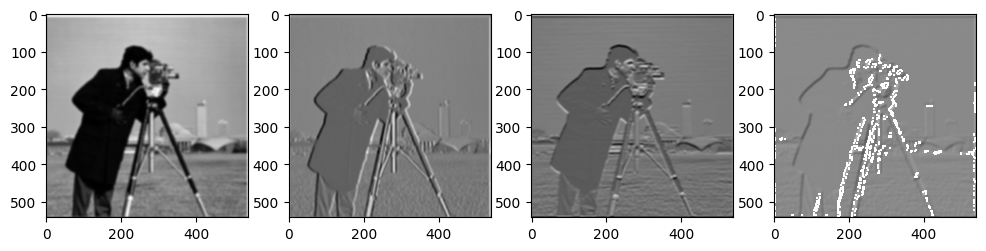

In [4]:
# Q1.2 - Gaussian Blurring
# Gaussian Kernel
gauss_2d_kernel = cv2.getGaussianKernel(10, 3) * cv2.getGaussianKernel(10, 3).T

# Convolution
img_gauss = signal.convolve2d(img, gauss_2d_kernel, mode="same")

# Gauss D_x
gauss_D_x = signal.convolve2d(gauss_2d_kernel, D_x, mode="same")
img_gauss_D_x = signal.convolve2d(img, gauss_D_x, mode="same")

# Gauss D_y
gauss_D_y = signal.convolve2d(gauss_2d_kernel, D_y, mode="same")
img_gauss_D_y = signal.convolve2d(img, gauss_D_y, mode="same")

# TODO: Gauss Edge Filtering

# gradient_mag = np.sqrt((edge_D_x**2) + (edge_D_y**2))
# gauss_img_edge = signal.convolve2d(img_gauss, gradient_mag, mode="same")
# gauss_img_binarize = np.ma.masked_inside(gauss_img_edge, 2, 2.4, copy=True)

gradient_mag = (edge_D_x + edge_D_y)/2
gauss_img_edge = signal.convolve2d(img_gauss, gradient_mag, mode="same")
gauss_img_binarize = np.ma.masked_inside(gauss_img_edge, 0.12, 0.13, copy=True)



plt.figure(figsize=(12, 4))
plt.subplot(141); plt.imshow(img_gauss, cmap="gray")
plt.subplot(142); plt.imshow(img_gauss_D_x, cmap="gray")
plt.subplot(143); plt.imshow(img_gauss_D_y, cmap="gray")
plt.subplot(144); plt.imshow(gauss_img_binarize, cmap="gray")

Differences: The gaussian filter applied on the partial derivatives x and y retain different brightness values, whereas the regularly convoluted images are converted to a single grayscale color.

TODO: Add diff for edge filtering

<h2>Part 2</h2>

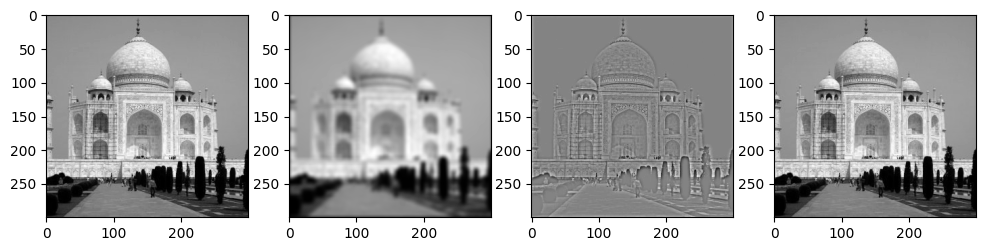

In [5]:
# Q 2.1 - "Sharpening"
img = skio.imread("../images/taj.jpg")
img = rgb2gray(img[:,:,:3])

img_gauss = signal.convolve2d(img, gauss_2d_kernel, mode="same")
details = img - img_gauss
alpha = 1
img_sharpened = img_gauss + (alpha * details)

# TODO: Add custom images

plt.figure(figsize=(12, 4))
plt.subplot(141); plt.imshow(img, cmap="gray")
plt.subplot(142); plt.imshow(img_gauss, cmap="gray")
plt.subplot(143); plt.imshow(details, cmap="gray")
plt.subplot(144); plt.imshow(img_sharpened, cmap="gray")

In [30]:
# Q2.2 - Hybrid Image

# First load images

# high sf
im1 = plt.imread('../images/DerekPicture.jpg')/255

# low sf
im2 = plt.imread('../images/nutmeg.jpg')/255

%matplotlib qt5

# Next align images (this code is provided, but may be improved)
im2_aligned, im1_aligned = align_images(im2, im1)
im1_aligned, im2_aligned = rgb2gray(im1_aligned), rgb2gray(im2_aligned)

## You will provide the code below. Sigma1 and sigma2 are arbitrary 
## cutoff values for the high and low frequencies

def create_gaussian_kernel(ksize, sigma):
    return cv2.getGaussianKernel(ksize, sigma) * cv2.getGaussianKernel(ksize, sigma).T

def hybrid_image(image1, image2, sigma1, sigma2):
    # print(im1.shape)
    # print(im2.shape)
    lp_filter = signal.convolve2d(image1, create_gaussian_kernel(10, sigma1), mode="same")
    lp = lp_filter
    hp_filter = image2 - signal.convolve2d(image2, create_gaussian_kernel(50, sigma2), mode="same")
    hp = hp_filter
    return [lp, hp, (hp_filter + lp_filter) / 2]

sigma1 = 3
sigma2 = 15
lp, hp, hybrid = hybrid_image(im1_aligned, im2_aligned, sigma1, sigma2)
# print(hybrid.shape)

plt.imshow(hybrid)
plt.show

# ## Compute and display Gaussian and Laplacian Pyramids
# ## You also need to supply this function
# N = 5 # suggested number of pyramid levels (your choice)
# pyramids(hybrid, N)

plt.imshow(hybrid, cmap="gray")

Please select 2 points in each image for alignment.


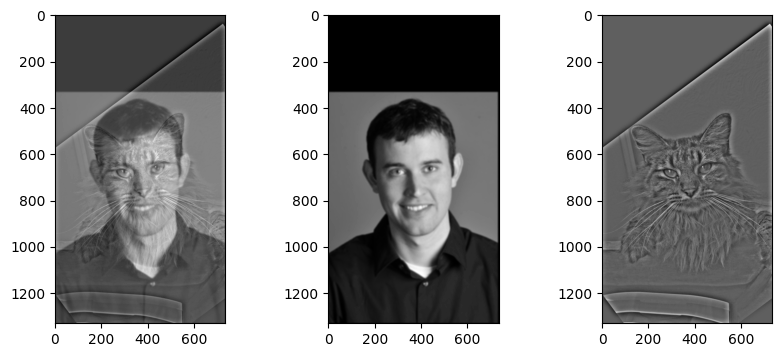

In [31]:
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.subplot(131); plt.imshow(hybrid, cmap="gray")
plt.subplot(132); plt.imshow(lp, cmap="gray")
plt.subplot(133); plt.imshow(hp, cmap="gray")


In [187]:
# Q2.3 - Gaussian and Laplacian Stacks
%matplotlib inline

apple = plt.imread('../images/apple.jpeg')/255
orange = plt.imread('../images/orange.jpeg')/255
# print(apple.shape, orange.shape)

def gaussian_stack(image):
    res = [image[:,:,0]]
    ksize = 6
    sigma = 64
    while sigma > 4:
        # print(int(ksize), sigma)
        res.append(signal.convolve2d(image[:,:,0], create_gaussian_kernel(int(ksize), sigma), mode="same"))
        ksize *= 2
        sigma /= 2
    return res

def laplacian_stack(gauss_stack):
    res = []
    for i in range(1, len(gauss_stack)):
        res.append(gauss_stack[i-1] - gauss_stack[i])
    res.append(gauss_stack[-1])
    return res

def display_stack(stack):
    plt.figure(figsize=(16, 4))
    plt.subplot(151); plt.imshow(stack[0], cmap="gray")
    plt.subplot(152); plt.imshow(stack[1], cmap="gray")
    plt.subplot(153); plt.imshow(stack[2], cmap="gray")
    plt.subplot(154); plt.imshow(stack[3], cmap="gray")
    plt.subplot(155); plt.imshow(stack[4], cmap="gray")

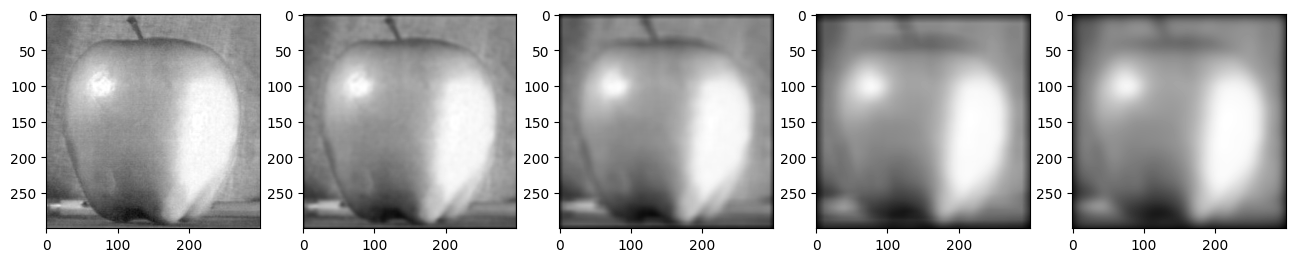

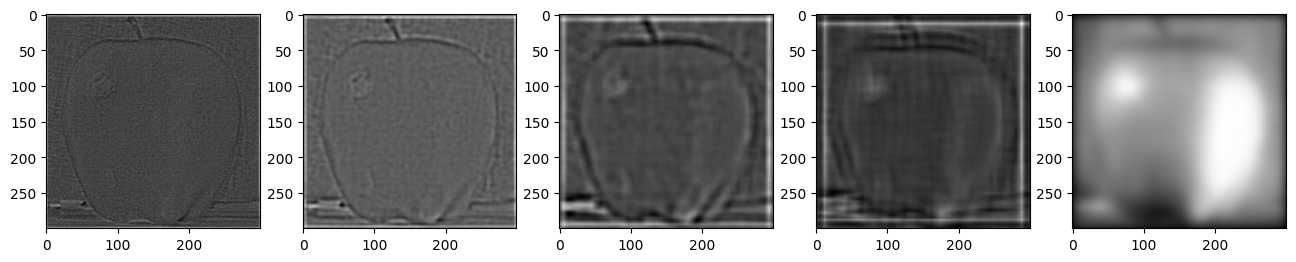

In [188]:
# Apple stacks
apple_gauss_stack = gaussian_stack(apple)
apple_laplacian_stack = laplacian_stack(apple_gauss_stack)

display_stack(apple_gauss_stack)
display_stack(apple_laplacian_stack)

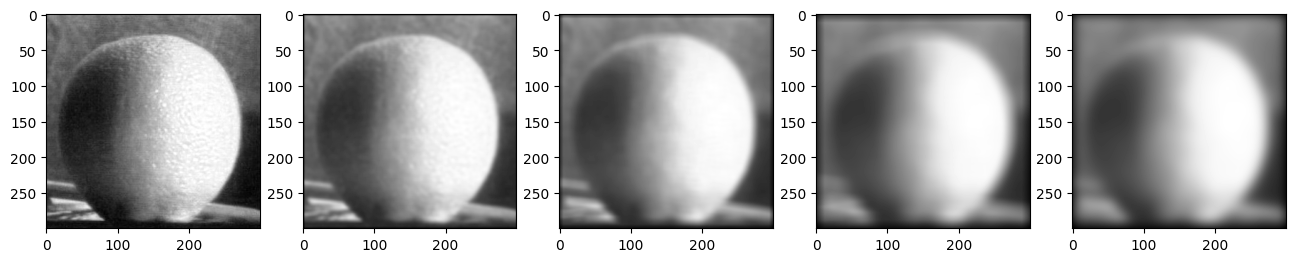

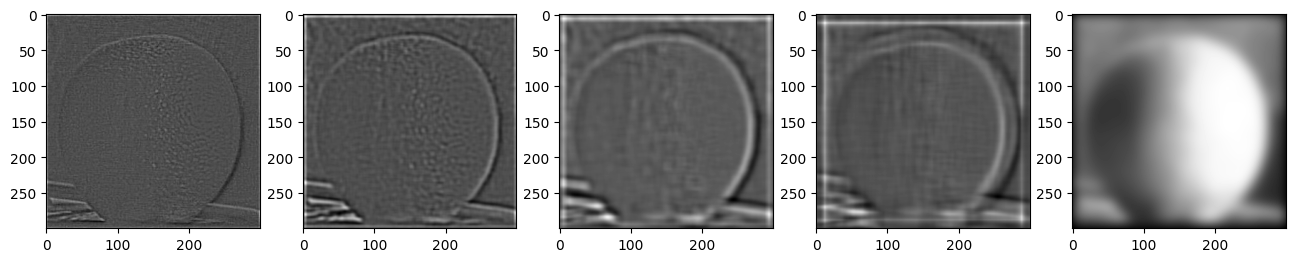

In [189]:
# Orange stack
orange_gauss_stack = gaussian_stack(orange)
orange_laplacian_stack = laplacian_stack(orange_gauss_stack)

display_stack(orange_gauss_stack)
display_stack(orange_laplacian_stack)

In [190]:
# Laplacian sanity check
orange_sanity = orange_laplacian_stack[-1]
for i in range(len(orange_laplacian_stack)-2, -1, -1):
    orange_sanity += orange_laplacian_stack[i]
# plt.imshow(orange_sanity, cmap="gray")

In [191]:
# Gaussian mask
mask_left = plt.imread('../images/mask.jpg')/255
mask_right = 1 - mask_left
mask_left_gs = gaussian_stack(mask_left)
mask_right_gs = gaussian_stack(mask_right)


In [192]:
def normalize(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))

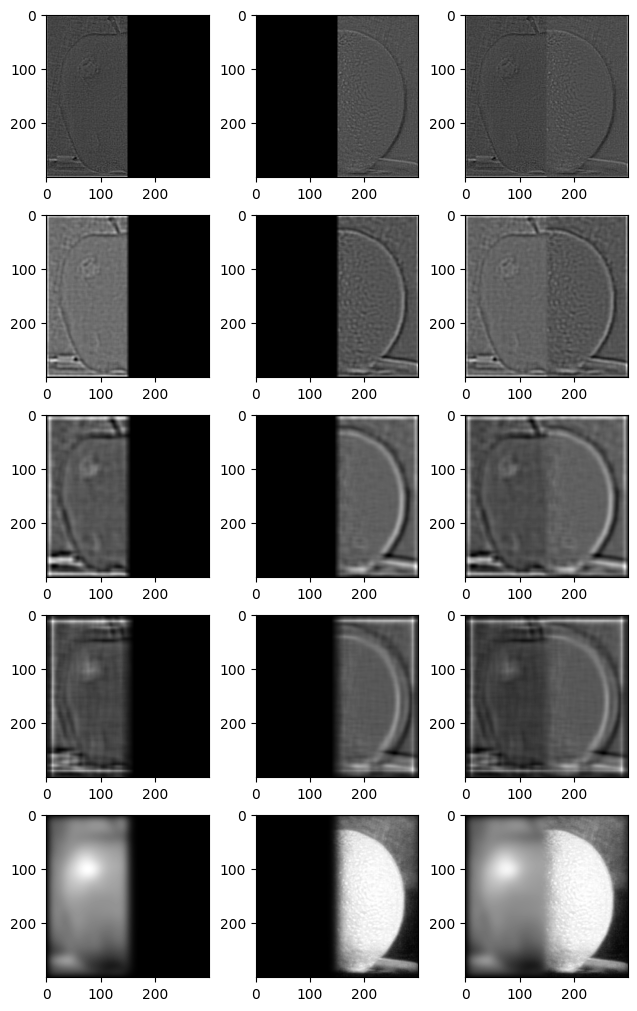

In [197]:
# Create final stack
blended_apple = []
blended_orange = []
final_stack = []
for i in range(len(apple_laplacian_stack)):
    la = normalize(mask_left_gs[i]) * normalize(apple_laplacian_stack[i])
    lb = normalize(mask_right_gs[i]) * normalize(orange_laplacian_stack[i])
    blended_apple.append(la)
    blended_orange.append(lb)
    final_stack.append(la + lb)

# display_stack(final_stack)

plt.figure(figsize=(16, 10), layout="compressed")
plt.subplot(531); plt.imshow(blended_apple[0], cmap="gray")
plt.subplot(532); plt.imshow(blended_orange[0], cmap="gray")
plt.subplot(533); plt.imshow(final_stack[0], cmap="gray")
plt.subplot(534); plt.imshow(blended_apple[1], cmap="gray")
plt.subplot(535); plt.imshow(blended_orange[1], cmap="gray")
plt.subplot(536); plt.imshow(final_stack[1], cmap="gray")
plt.subplot(537); plt.imshow(blended_apple[2], cmap="gray")
plt.subplot(538); plt.imshow(blended_orange[2], cmap="gray")
plt.subplot(539); plt.imshow(final_stack[2], cmap="gray")
plt.subplot(5,3,10); plt.imshow(blended_apple[3], cmap="gray")
plt.subplot(5,3,11); plt.imshow(blended_orange[3], cmap="gray")
plt.subplot(5,3,12); plt.imshow(final_stack[3], cmap="gray")
plt.subplot(5,3,13); plt.imshow(blended_apple[4], cmap="gray")
plt.subplot(5,3,14); plt.imshow(blended_orange[4], cmap="gray")
plt.subplot(5,3,15); plt.imshow(final_stack[4], cmap="gray")

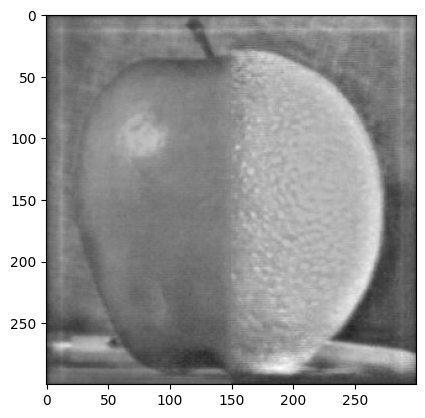

In [215]:
# Combine final stack
orapple = final_stack[-1]
for i in range(len(final_stack)-1, -1, -1):
    orapple += final_stack[i]
orapple_norm = normalize(orapple)
# print(orapple_norm)
plt.imshow(orapple_norm, cmap="gray")